<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Analyzing the Apprentice Chef's First Year Customer </h2>
<h4>DAT-5303 | Classification Model Development | Individual Assignment</h4>
Models used Logistic Regression, CART Tree, Random Forest and Gradient Boosted Machines <br>
Created by <a href="https://www.linkedin.com/in/linginenivishal/"> Vishal Lingineni </a> <br>
Hult International Business School

<br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Purpose of this Script</h2><br>
This script is designed to analyze the Apprentice Chef's First Year Customer Data to predict which customer will subscribe to Halfway There cross-selling promotion.
<br>
<h2>Analytical Objectives</h2><br>
a) Make a prediction for which customers will subscribe to this promotion.<br>
b) Identify key features that impact subscription.
<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part I: Importing & Exploring the Data  </h2><br>

In [709]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import numpy as np # mathematical essentials

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'

# reading the file into Python
restarunt = pd.read_excel(io=file)

In [710]:
restarunt.columns = map(str.lower, restarunt.columns)

<h2>Part II: Handling Missing Values </h2>

In [711]:
# checking the missing values in each column
restarunt.isnull().sum(axis=0)

revenue                         0
cross_sell_success              0
name                            0
email                           0
first_name                      0
family_name                    47
total_meals_ordered             0
unique_meals_purch              0
contacts_w_customer_service     0
product_categories_viewed       0
avg_time_per_site_visit         0
mobile_number                   0
cancellations_before_noon       0
cancellations_after_noon        0
tastes_and_preferences          0
pc_logins                       0
mobile_logins                   0
weekly_plan                     0
early_deliveries                0
late_deliveries                 0
package_locker                  0
refrigerated_locker             0
avg_prep_vid_time               0
largest_order_size              0
master_classes_attended         0
median_meal_rating              0
avg_clicks_per_visit            0
total_photos_viewed             0
dtype: int64

In [712]:
# imputting the missing values of family name with Unknown
restarunt.loc[:,'family_name'].fillna('Unknown',inplace = True)

<h2>Part III: Feature Engineering </h2>

In [713]:
restarunt['avg_revenue_per_order'] = 0
for index, value in restarunt.iterrows():
    if restarunt.loc[index,'revenue'] > 0:
        restarunt.loc[index,'avg_revenue_per_order'] = (restarunt.loc[index,'revenue'] / restarunt.loc[index,'total_meals_ordered']).round(0)
                                            

In [714]:
restarunt['total_deliveries'] = 0
restarunt['total_cancellations'] = 0
for index, value in restarunt.iterrows():
    restarunt.loc[index, 'total_deliveries'] = restarunt.loc[index, 'early_deliveries'] + restarunt.loc[index, 'late_deliveries']
    restarunt.loc[index, 'total_cancellations'] = restarunt.loc[index, 'cancellations_before_noon'] + restarunt.loc[index, 'cancellations_after_noon']

In [715]:
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in restarunt.iterrows():
    
    # splitting email domain at '@'
    split_email = restarunt.loc[index, 'email'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

# displaying the results
email_df[1].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
merck.com            28
cocacola.com         28
jnj.com              28
mcdonalds.com        28
apple.com            27
nike.com             27
ge.org               26
ibm.com              26
dupont.com           26
microsoft.com        25
chevron.com          25
exxon.com            24
travelers.com        24
unitedhealth.com     24
boeing.com           23
pg.com               22
mmm.com              22
caterpillar.com      22
verizon.com          22
walmart.com          21
disney.com           21
pfizer.com           20
visa.com             20
jpmorgan.com         19
goldmansacs.com      18
unitedtech.com       18
cisco.com            18
intel.com            17
homedepot.com        17
Name: 1, dtype: int64

In [716]:
email_df.columns = ['0' , 'email_domain']
#restarunt['email_domain'] = pd.Series(email_df['email_domain'])
# defining Emails Domain Groups
professional_email_domains = ['@mmm.com', '@amex.com', '@apple.com',
                              '@boeing.com', '@caterpillar.com', '@chevron.com',
                             '@cisco.com', '@cocacola.com', '@disney.com',
                             '@dupont.com', '@exxon.com', '@ge.org', 
                              '@goldmansacs.com', '@homedepot.com', '@ibm.com',
                             '@intel.com', '@jnj.com', '@jpmorgan.com', 
                              '@mcdonalds.com', '@merck.com', '@microsoft.com',
                             '@nike.com', '@pfizer.com', '@pg.com', 
                              '@travelers.com', '@unitedtech.com', 
                              '@verizon.com','@visa.com', '@walmart.com',
                             '@unitedhealth.com']

personal_email_domains     = ['@gmail.com', '@yahoo.com', '@protonmail.com']

junk_email_domains = ['@me.com','@aol.com','@live.com', '@msn.com', 
                              '@passport.com','@hotmail.com']

# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in email_df['email_domain']:
        if '@' + domain in personal_email_domains:
            placeholder_lst.append('personal')
            
        elif '@' + domain in professional_email_domains:
            placeholder_lst.append('professional')
            
        else:
            placeholder_lst.append('junk')


# concatenating with original DataFrame
restarunt['domain_group'] = pd.Series(placeholder_lst)


# checking results
restarunt['domain_group'].value_counts()


personal        861
professional    696
junk            389
Name: domain_group, dtype: int64

In [717]:
# one hot encoding categorical variables
one_hot_email_domain      = pd.get_dummies(restarunt['domain_group'])

# dropping categorical variables after they've been encoded
restarunt = restarunt.drop('domain_group', axis = 1)

# joining codings together
restarunt = restarunt.join([one_hot_email_domain])

In [718]:
restarunt.shape

(1946, 34)

In [719]:
# creating a dummy variable to check whether uses mobile app
#restarunt['uses_mobile_app'] = 0
#restarunt.loc[restarunt.mobile_logins > 0, 'uses_mobile_app'] = 1
# as p-value is to high didnt use in the model

In [720]:
# creating a dummy variable to flag active users basing on their actions
#restarunt['high_new_customer_engagement'] = 0

#restarunt.loc[(restarunt.mobile_number == 1) & (restarunt.tastes_and_preferences == 1) & (restarunt.weekly_plan == 0),'high_new_customer_engagement' ] = 1

In [721]:
#restarunt['log_revenue'] = np.log10(restarunt['revenue'])
#restarunt['log_avg_time_per_site_visit'] = np.log10(restarunt['avg_time_per_site_visit'])
#restarunt['log_avg_prep_vid_time'] = np.log10(restarunt['avg_prep_vid_time'])

In [722]:
restarunt['len_of_name'] = restarunt["name"].str.len()

In [723]:
restarunt['len_of_name']

0        7
1       15
2       14
3       17
4       13
        ..
1941    10
1942    17
1943    12
1944     6
1945    14
Name: len_of_name, Length: 1946, dtype: int64

In [724]:
# dummy variable for doing cooking classes in masters.
restarunt['has_master_classes_attended'] = 0

for index, value in restarunt.iterrows():
    if restarunt.loc[index, 'master_classes_attended'] > 0 :
        restarunt.loc[index, 'has_master_classes_attended'] = 1

In [725]:
# guessing gender based on (given) name
#import gender_guesser.detector as gender # guess gender based on (given) name
# placeholder list
placeholder_lst = []


# looping to guess gender
#for name in restarunt['first_name']:
 #   guess = gender.Detector().get_gender(name)
    #print(guess)
  #  placeholder_lst.append(guess)


# converting list into a series
#restarunt['gender_guess'] = pd.Series(placeholder_lst)


# checking results
#restarunt.loc[:, ['first_name','gender_guess']]

In [726]:
#for val in placeholder_lst:
 #   print("'%s'," %val)

In [727]:
# Hard coded the gender basing on gender guesser package
placeholder=['unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'female',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'mostly_male',
'female',
'unknown',
'male',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'male',
'unknown',
'male',
'unknown',
'unknown',
'male',
'male',
'male',
'female',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'male',
'unknown',
'male',
'unknown',
'female',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'male',
'female',
'female',
'unknown',
'male',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'female',
'unknown',
'andy',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'mostly_male',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_male',
'unknown',
'mostly_male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'female',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'mostly_male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'female',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'male',
'unknown',
'male',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'mostly_male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_female',
'unknown',
'unknown',
'andy',
'unknown',
'unknown',
'female',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_female',
'unknown',
'male',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'andy',
'male',
'unknown',
'unknown',
'male',
'male',
'female',
'female',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_female',
'female',
'unknown',
'male',
'female',
'unknown',
'unknown',
'unknown',
'female',
'male',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'female',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'male',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_female',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_female',
'mostly_female',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'female',
'female',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'female',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'female',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'male',
'male',
'male',
'male',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'female',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_female',
'mostly_female',
'unknown',
'male',
'unknown',
'female',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'female',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'male',
'unknown',
'female',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'male',
'male',
'male',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'female',
'male',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'male',
'male',
'mostly_male',
'male',
'male',
'male',
'male',
'mostly_male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'male',
'unknown',
'unknown',
'andy',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'mostly_male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'female',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'male',
'mostly_male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'male',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'male',
'unknown',
'male',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'female',
'female',
'male',
'male',
'female',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_male',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'male',
'andy',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'female',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'male',
'male',
'unknown',
'female',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'andy',
'unknown',
'female',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'female',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'mostly_male',
'male',
'male',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'male',
'male',
'male',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'mostly_male',
'male',
'unknown',
'male',
'unknown',
'unknown',
'female',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'male',
'male',
'unknown',
'male',
'male',
'male',
'male',
'unknown',
'unknown',
'unknown',
'female',
'male',
'male',
'unknown',
'male',
'unknown',
'mostly_female',
'male',
'unknown',
'unknown',
'female',
'male',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'male',
'unknown',
'unknown',
'unknown',
'female',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_female',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'male',
'male',
'female',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'mostly_male',
'mostly_male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'female',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'male',
'male',
'male',
'mostly_male',
'unknown',
'unknown',
'male',
'andy',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'mostly_female',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'male',
'female',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'mostly_female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'female',
'male',
'female',
'mostly_female',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'male',
'male',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'mostly_female',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'female',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'female',
'female',
'female',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_female',
'male',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'mostly_female',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'mostly_female',
'female',
'female',
'male',
'male',
'male',
'unknown',
'unknown',
'mostly_female',
'unknown',
'unknown',
'male',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'female',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'female',
'unknown',
'male',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'male',
'unknown',
'andy',
'unknown',
'unknown',
'male',
'male',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'mostly_male',
'male',
'male',
'unknown',
'male',
'unknown',
'mostly_male',
'female',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_female',
'unknown',
'unknown',
'unknown',
'female',
'female',
'unknown',
'unknown',
'unknown',
'mostly_male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_female',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'male',
'unknown',
'female',
'unknown',
'unknown',
'male',
'male',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_female',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'andy',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'mostly_male',
'unknown',
'male',
'male',
'unknown',
'unknown',
'male',
'male',
'male',
'male',
'andy',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'female',
'female',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'female',
'unknown',
'unknown']

In [728]:
# converting list into a series
restarunt['gender_guess'] = pd.Series(placeholder)

In [729]:
restarunt['gender_guess'].value_counts()

unknown          1385
male              381
female            125
mostly_male        24
mostly_female      21
andy               10
Name: gender_guess, dtype: int64

In [730]:
# one hot encoding categorical variables
one_hot_gender_guess      = pd.get_dummies(restarunt['gender_guess'])

# dropping categorical variables after they've been encoded
restarunt = restarunt.drop('gender_guess', axis = 1)

# joining codings together
restarunt = restarunt.join([one_hot_gender_guess])

In [731]:
#restarunt.loc[ : , 'FREQ_SPL_ORDS' ] = (restarunt.loc[ : , 'TOTAL_MEALS_ORDERED' ]/
 #                                                  restarunt.loc[ : ,'UNIQUE_MEALS_PURCH' ]).round(2)

restarunt.loc[ : , 'complnt_mgmn' ] = (restarunt.loc[ : , 'contacts_w_customer_service' ]/
                                              restarunt.loc[ : , 'total_meals_ordered' ]).round(2)

#restarunt.loc[ : , 'PROBLM_ORDRNG' ] = ((restarunt.loc[ : ,'EARLY_DELIVERIES'] + chef.loc[ : , 'LATE_DELIVERIES' ])/
#                                    restarunt.loc[ : ,'TOTAL_MEALS_ORDERED' ]).round(2)


In [732]:
restarunt['log_pc_logins'] = np.log10(restarunt['pc_logins'])
restarunt['log_total_meals_ordered'] = np.log10(restarunt['total_meals_ordered'])

In [733]:
#restarunt.to_excel("restarunt.xlsx")

<h2>Part IV: Predictive Modeling </h2>

In [734]:
restarunt.shape

(1946, 45)

In [735]:
# creating a (Pearson) correlation matrix
df_corr = restarunt.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(df_corr.loc['cross_sell_success'].sort_values(ascending = False))

cross_sell_success             1.00
professional                   0.19
len_of_name                    0.18
cancellations_before_noon      0.16
total_cancellations            0.14
male                           0.11
mobile_number                  0.10
tastes_and_preferences         0.08
refrigerated_locker            0.07
log_pc_logins                  0.05
has_master_classes_attended    0.05
personal                       0.04
pc_logins                      0.04
mostly_male                    0.04
package_locker                 0.04
contacts_w_customer_service    0.04
master_classes_attended        0.04
avg_prep_vid_time              0.03
median_meal_rating             0.03
largest_order_size             0.02
early_deliveries               0.02
log_total_meals_ordered        0.02
late_deliveries                0.01
total_deliveries               0.01
total_meals_ordered            0.01
total_photos_viewed            0.01
avg_time_per_site_visit        0.01
revenue                     

In [736]:
restarunt_explanatory = restarunt.copy()


# dropping SalePrice and Order from the explanatory variable set
restarunt_explanatory = restarunt.drop(['cross_sell_success','name','email','first_name','family_name'], axis = 1)


# formatting each explanatory variable for statsmodels
for val in restarunt_explanatory:
    print(val,'+')

revenue +
total_meals_ordered +
unique_meals_purch +
contacts_w_customer_service +
product_categories_viewed +
avg_time_per_site_visit +
mobile_number +
cancellations_before_noon +
cancellations_after_noon +
tastes_and_preferences +
pc_logins +
mobile_logins +
weekly_plan +
early_deliveries +
late_deliveries +
package_locker +
refrigerated_locker +
avg_prep_vid_time +
largest_order_size +
master_classes_attended +
median_meal_rating +
avg_clicks_per_visit +
total_photos_viewed +
avg_revenue_per_order +
total_deliveries +
total_cancellations +
junk +
personal +
professional +
len_of_name +
has_master_classes_attended +
andy +
female +
male +
mostly_female +
mostly_male +
unknown +
complnt_mgmn +
log_pc_logins +
log_total_meals_ordered +


In [737]:
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)

In [738]:
# declaring explanatory variables
restarunt_data = restarunt.drop(['cross_sell_success','name','email','first_name','family_name'], axis = 1)


# declaring response variable
restarunt_response = restarunt.loc[ : , 'cross_sell_success']


In [739]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            restarunt_data,
            restarunt_response,
            test_size    = 0.25,
            random_state = 219,
            stratify     = restarunt_response)


# merging training data for statsmodels
restarunt_train = pd.concat([x_train, y_train], axis = 1)

In [740]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: cross_sell_success, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.68
0    0.32
Name: cross_sell_success, dtype: float64



<h4>Logistic Regression</h4>

In [741]:
import statsmodels.formula.api as smf

In [742]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ cross_sell_success ~
len_of_name +
mobile_number +
cancellations_before_noon +
tastes_and_preferences +
log_pc_logins +
early_deliveries +
avg_prep_vid_time+
refrigerated_locker+
junk +
professional +
male  +
female 
 """,
                                        data    = restarunt_train)

# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.532535
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     cross_sell_success   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1446
Method:                           MLE   Df Model:                           12
Date:                Thu, 28 Jan 2021   Pseudo R-squ.:                  0.1520
Time:                        12:18:23   Log-Likelihood:                -776.97
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 1.550e-52
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -4.4269      1.061     -4.171      0.000      -6.507      -2.347
len_of_name                   0.0803      0.013      6.206      0.000       0.055       0.106
mobile_number                 0.9249      0.178      5.185      0.000       0.575       1.274
cancellations_before_noon     0.2815      0.047      5.991      0.000       0.189       0.374
tastes_and_preferences        0.3825      0.137      2.794      0.005       0.114       0.651
log_pc_logins                 3.1997      1.349      2.371      0.018       0.555       5.844
early_deliveries              0.0616      0.028      2.211      0.027       0.007       0.116
avg_prep_vid_time             0.0026      0.001      2.061      0.039       0.000       0.005
refrigerated_locker           0.5324      0.212      2.517      0.012       0.118       0.947
junk                         -1.3282      0.159     -8.350      0.000      -1.640      -1.016
professional                  0.6028      0.146      4.140      0.000       0.317       0.888
male                          0.4873      0.168      2.907      0.004       0.159       0.816
female                       -0.6332      0.240     -2.639      0.008      -1.104      -0.163
=============================================================================================
"""

In [743]:
# using different combination of x- variables
logit_sig = ['mobile_number','total_cancellations',
            'tastes_and_preferences','pc_logins','early_deliveries','refrigerated_locker',
            'avg_prep_vid_time','junk','personal']
logit_sig2 = ['mobile_number','cancellations_before_noon',
            'tastes_and_preferences','log_pc_logins','early_deliveries','avg_prep_vid_time',
              'junk','personal','len_of_name','refrigerated_locker','female','male'] 
logit_sig3 = ['mobile_number','cancellations_before_noon',
            'tastes_and_preferences','pc_logins','early_deliveries','avg_prep_vid_time',
              'junk','personal','len_of_name','refrigerated_locker','unknown','male']
logit_sig4 = ["mobile_number","cancellations_before_noon","tastes_and_preferences",
                   "contacts_w_customer_service","pc_logins",
                   "refrigerated_locker","junk","personal","avg_revenue_per_order"
              ,"len_of_name","early_deliveries"]
logit_sig5 = ['mobile_number','cancellations_before_noon',
            'tastes_and_preferences','pc_logins','early_deliveries','refrigerated_locker',
              'junk','personal','len_of_name','has_master_classes_attended','female','male'] 
logit_sig6 = ['mobile_number','cancellations_before_noon',
            'tastes_and_preferences','pc_logins','early_deliveries','avg_prep_vid_time',
              'junk','professional','len_of_name','refrigerated_locker','male','female']
logit_sig7 = ['total_meals_ordered' , 
 'mobile_number' , 
 'cancellations_before_noon' , 
 'tastes_and_preferences' ,
 'early_deliveries' ,
 'refrigerated_locker' , 
 'log_total_meals_ordered' , 
 'log_pc_logins' , 
 'complnt_mgmn' , 
 'personal' , 
 'junk',
 'len_of_name' ,
 'male',
 'female'
]


In [744]:
from sklearn.linear_model import LogisticRegression

In [745]:
# train/test split with the full model
restarunt_data   =  restarunt.loc[ : , logit_sig7]
restarunt_target =  restarunt.loc[ : , 'cross_sell_success']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            restarunt_data,
            restarunt_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = restarunt_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)
# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)


LogReg Training ACCURACY: 0.7457
LogReg Testing  ACCURACY: 0.7495
LogReg Train-Test Gap   : 0.0038


C:\Users\Lingi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [746]:
from sklearn.metrics import confusion_matrix         # confusion matrix

In [747]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 62
False Positives: 94
False Negatives: 28
True Positives : 303



In [748]:
from sklearn.metrics import roc_auc_score            # auc score

In [749]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6564


In [750]:
# zipping each feature name to its coefficient
logreg_model_values = zip(restarunt[logit_sig].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', -0.51)
('mobile_number', 0.0)
('total_cancellations', 0.86)
('tastes_and_preferences', 0.27)
('pc_logins', 0.31)
('early_deliveries', 0.06)
('refrigerated_locker', 0.49)
('avg_prep_vid_time', -0.16)
('junk', -0.16)
('personal', -0.15)


<h4>CART Tree</h4>

In [751]:
# libraries for classification trees
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects

In [752]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [753]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                    y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                    y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 1.0
Full Tree Testing ACCURACY : 0.6653
Full Tree AUC Score: 0.625


In [754]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 80
False Positives: 76
False Negatives: 87
True Positives : 244



In [755]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 4,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.7505
Testing  ACCURACY: 0.77
AUC Score        : 0.7088


In [756]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 84
False Positives: 72
False Negatives: 40
True Positives : 291



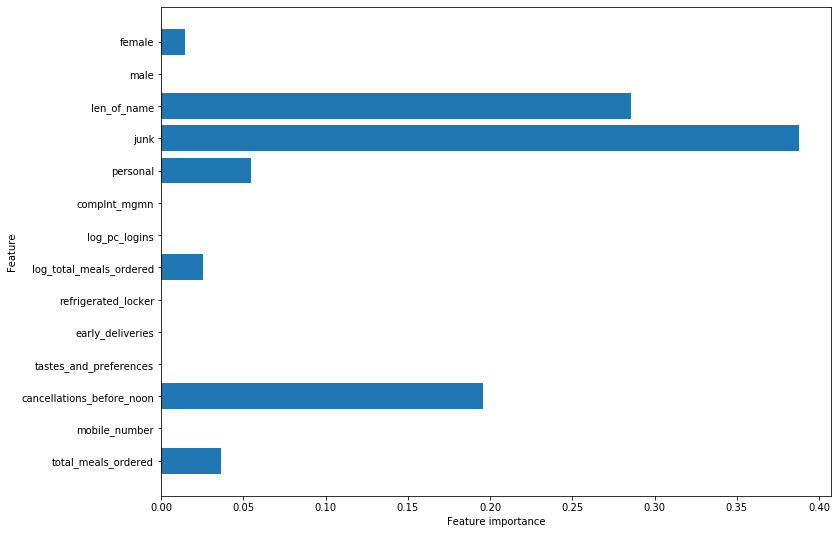

In [757]:
# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train  = x_train,
                         export = False)

In [758]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}         {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6564         (62, 94, 28, 303)
Full Tree     0.625         (80, 76, 87, 244)
Pruned Tree   0.7088         (84, 72, 40, 291)



,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6564,0.7457,0.7495,"(62, 94, 28, 303)"
1,Full Tree,0.6250,1.0000,0.6653,"(80, 76, 87, 244)"
2,Pruned Tree,0.7088,0.7505,0.7700,"(84, 72, 40, 291)"


<h4>Hyperparameter Tuned Logistic Regression </h4>

In [759]:
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer

In [760]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
#C_space          = pd.np.arange(0.1, 5.0, 0.1)
#warm_start_space = [True, False]
#solver_space     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
#param_grid = {'C'          : C_space,
 #             'warm_start' : warm_start_space,
  #            'solver'     : solver_space}


# INSTANTIATING the model object without hyperparameters
#lr_tuned = LogisticRegression(random_state = 219,
#                              max_iter     = 4000)


# GridSearchCV object
#lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
 #                                param_distributions = param_grid, # parameters to tune
  #                               cv                  = 3,          # how many folds in cross-validation
   #                              n_iter              = 250,        # number of combinations of hyperparameters to try
    #                             random_state        = 219,        # starting point for random sequence
     #                            scoring = make_scorer(
      #                                     roc_auc_score,
       #                                    needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
#lr_tuned_cv.fit(restarunt_data, restarunt_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", lr_tuned_cv.best_params_)
#print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

In [761]:
# checking the best estimator for the model
#lr_tuned_cv.best_estimator_

<strong>Tunning Settings for each variable list is ran and stored here to save processing time </strong> <br>
LogisticRegression(C=4.3999999999999995, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=4000, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=219, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False) -> log_sig <br><br>
LogisticRegression(C=4.8, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=4000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=219, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) -> log_sig2 <br><br>
LogisticRegression(C=2.5000000000000004, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=4000, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=219, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=True)     <br>     
LogisticRegression(C=4.8, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=4000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=219, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) -> log_sig6         <br><br>
LogisticRegression(C=3.0000000000000004, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=4000, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=219, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) -> log_sig7                   

In [762]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(C=3.0000000000000004, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=4000, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=219, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


# FIT step is needed as we are not using .best_estimator
lr_tuned.fit(restarunt_data, restarunt_target)

# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

Training ACCURACY: 0.7553
Testing  ACCURACY: 0.7536
AUC Score        : 0.6679


In [763]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 67
False Positives: 89
False Negatives: 31
True Positives : 300



In [764]:
# declaring model performance objects
lr_train_acc = lr_tuned.score(x_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(x_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned LR',
                           'Training Accuracy' : lr_train_acc,
                           'Testing Accuracy'  : lr_test_acc,
                           'AUC Score'         : lr_auc,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6564,0.7457,0.7495,"(62, 94, 28, 303)"
1,Full Tree,0.6250,1.0000,0.6653,"(80, 76, 87, 244)"
2,Pruned Tree,0.7088,0.7505,0.7700,"(84, 72, 40, 291)"
3,Tuned LR,0.6679,0.7553,0.7536,"(67, 89, 31, 300)"


<h4>Tuned CART Tree

In [765]:
# declaring a hyperparameter space
#criterion_space = ['gini', 'entropy']
#splitter_space  = ['best', 'random']
#depth_space     = pd.np.arange(1, 25, 1)
#leaf_space      = pd.np.arange(1, 100, 1)


# creating a hyperparameter grid
#param_grid = {'criterion'        : criterion_space,
#              'splitter'         : splitter_space,
#              'max_depth'        : depth_space,
#              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
#tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
#tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
#                                   param_distributions   = param_grid,
#                                   cv                    = 3,
#                                   n_iter                = 1000,
#                                   random_state          = 219,
#                                   scoring = make_scorer(roc_auc_score,
#                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#tuned_tree_cv.fit(restarunt_data, restarunt_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", tuned_tree_cv.best_params_)
#print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

In [766]:
#tuned_tree_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=41, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=219, splitter='best')-> log_sig2 <br> <br>
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=41, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=219, splitter='best') -> log_sig6    <br> <br>  
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=24,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=14, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=219, splitter='random') -> log_sig7                      

In [767]:
#####################  FINAL MODEL ##############
##### NAME : TUNED TREES ###########

# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=24,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=14, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=219, splitter='random')

tree_tuned_fit = tree_tuned.fit(restarunt_data, restarunt_target)

# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.7656
Testing  ACCURACY: 0.7823
AUC Score        : 0.7382


In [768]:
#####################  FINAL MODEL ##############

####### CONFUSION MATRIX #########

# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 96
False Positives: 60
False Negatives: 46
True Positives : 285



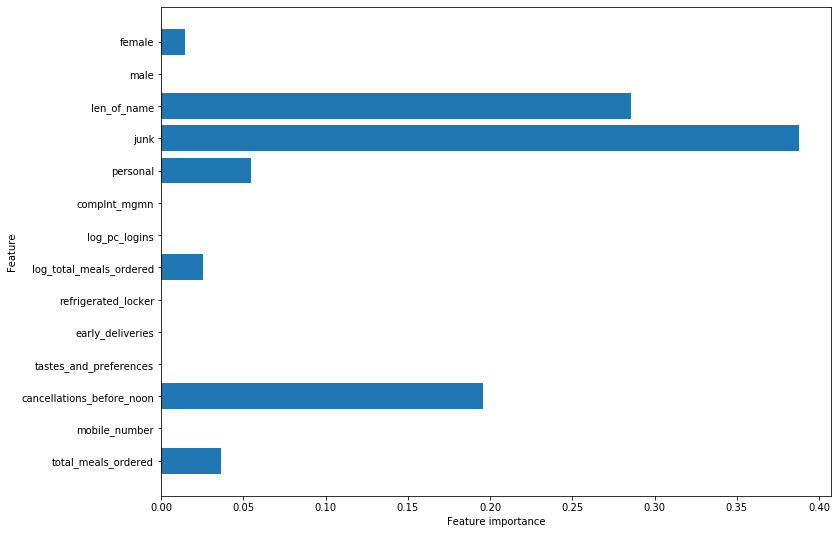

In [769]:
# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train  = x_train,
                         export = False)

In [770]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                             y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6564,0.7457,0.7495,"(62, 94, 28, 303)"
1,Full Tree,0.6250,1.0000,0.6653,"(80, 76, 87, 244)"
2,Pruned Tree,0.7088,0.7505,0.7700,"(84, 72, 40, 291)"
3,Tuned LR,0.6679,0.7553,0.7536,"(67, 89, 31, 300)"
4,Tuned Tree,0.7382,0.7656,0.7823,"(96, 60, 46, 285)"


<h4>Random Forest</h4>

In [771]:
from sklearn.ensemble import RandomForestClassifier     # random forest

In [772]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 1000,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [773]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 1.0
Testing  ACCURACY: 0.7351
AUC Score        : 0.6509


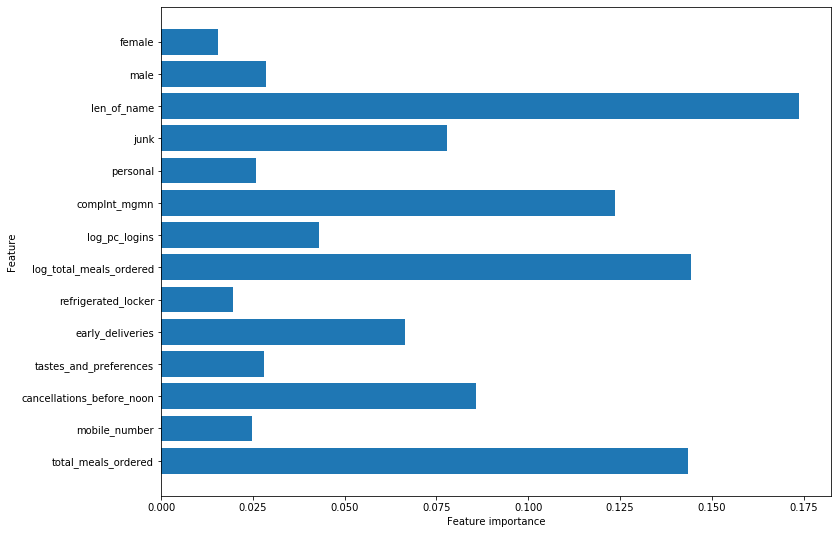

In [774]:
# plotting feature importances
plot_feature_importances(rf_default_fit,
                         train = x_train,
                         export = False)

In [775]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 65
False Positives: 91
False Negatives: 38
True Positives : 293



In [776]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6564,0.7457,0.7495,"(62, 94, 28, 303)"
1,Full Tree,0.6250,1.0000,0.6653,"(80, 76, 87, 244)"
2,Pruned Tree,0.7088,0.7505,0.7700,"(84, 72, 40, 291)"
3,Tuned LR,0.6679,0.7553,0.7536,"(67, 89, 31, 300)"
4,Tuned Tree,0.7382,0.7656,0.7823,"(96, 60, 46, 285)"
5,Random Forest (Full),0.6509,1.0000,0.7351,"(65, 91, 38, 293)"


<h4>Tuned Random Forest</h4>

In [777]:
# FITTING the training data
#rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
#rf_default_fit_pred = rf_default_fit.predict(x_test)


# declaring a hyperparameter space
#estimator_space  = pd.np.arange(100, 1100, 250) #start from 100 and go till 1100 with increment of 250
#leaf_space       = pd.np.arange(1, 31, 10)
#criterion_space  = ['gini', 'entropy']
#bootstrap_space  = [True, False]
#warm_start_space = [True, False]


# creating a hyperparameter grid
#param_grid = {'n_estimators'     : estimator_space,
#              'min_samples_leaf' : leaf_space,
#              'criterion'        : criterion_space,
#              'bootstrap'        : bootstrap_space,
#              'warm_start'       : warm_start_space}


# INSTANTIATING the model object without hyperparameters
#forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
#forest_cv = RandomizedSearchCV(estimator           = forest_grid,
#                               param_distributions = param_grid,
#                               cv         = 3,
#                               n_iter     = 1000,
#                               scoring    = make_scorer(roc_auc_score,
#                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#forest_cv.fit(restarunt_data, restarunt_target)


# PREDICT step is not needed


#printing the optimal parameters and best score
#print("Tuned Parameters  :", forest_cv.best_params_)
#print("Tuned Training AUC:", forest_cv.best_score_.round(4))

In [778]:
# best estimators based on RandomizedSearchCV
#forest_cv.best_estimator_

<strong>Tunning Settings for each variable list is ran and stored here to save processing time </strong> <br>
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=219,
                       verbose=0, warm_start=True) -> log_sig <br><br>
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=219,
                       verbose=0, warm_start=True) -> log_sig2  <br><br>
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=219,
                       verbose=0, warm_start=True)   <br><br>
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=219,
                       verbose=0, warm_start=True) -> log_sig5 <br><br>
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=21, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=219,
                       verbose=0, warm_start=True) -> log_sig6 <br><br>
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=219,
                       verbose=0, warm_start=True) -> log_sig7               

In [779]:
# building a model based on hyperparameter tuning results

# copy/pasting in the best_estimator_ results
# to avoid running another RandomizedSearch
forest_tuned = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=219,
                       verbose=0, warm_start=True)


# FITTING the model object
forest_tuned_fit = forest_tuned.fit(restarunt_data, restarunt_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                   y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.8095
Forest Tuned Testing  ACCURACY: 0.8398
Forest Tuned AUC Score        : 0.7737


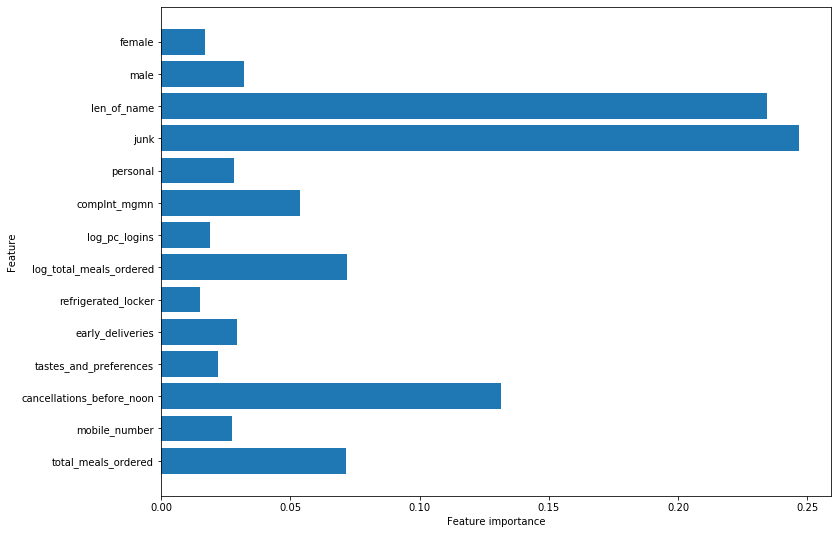

In [780]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [781]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 92
False Positives: 64
False Negatives: 14
True Positives : 317



In [782]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6564,0.7457,0.7495,"(62, 94, 28, 303)"
1,Full Tree,0.6250,1.0000,0.6653,"(80, 76, 87, 244)"
2,Pruned Tree,0.7088,0.7505,0.7700,"(84, 72, 40, 291)"
3,Tuned LR,0.6679,0.7553,0.7536,"(67, 89, 31, 300)"
4,Tuned Tree,0.7382,0.7656,0.7823,"(96, 60, 46, 285)"
5,Random Forest (Full),0.6509,1.0000,0.7351,"(65, 91, 38, 293)"
6,Tuned Random Forest (Full),0.7737,0.8095,0.8398,"(92, 64, 14, 317)"


<h4>Gradient Boosted Machines</h4>

In [783]:
from sklearn.ensemble import GradientBoostingClassifier # gbm

In [784]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.817
Testing ACCURACY : 0.7515
AUC Score        : 0.6715


In [785]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 70
False Positives: 86
False Negatives: 35
True Positives : 296



In [786]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6564,0.7457,0.7495,"(62, 94, 28, 303)"
1,Full Tree,0.6250,1.0000,0.6653,"(80, 76, 87, 244)"
2,Pruned Tree,0.7088,0.7505,0.7700,"(84, 72, 40, 291)"
3,Tuned LR,0.6679,0.7553,0.7536,"(67, 89, 31, 300)"
4,Tuned Tree,0.7382,0.7656,0.7823,"(96, 60, 46, 285)"
5,Random Forest (Full),0.6509,1.0000,0.7351,"(65, 91, 38, 293)"
6,Tuned Random Forest (Full),0.7737,0.8095,0.8398,"(92, 64, 14, 317)"
7,GBM (Full),0.6715,0.8170,0.7515,"(70, 86, 35, 296)"


<h4>Tuned GBM </h4>

In [787]:
# declaring a hyperparameter space
#learn_space        = pd.np.arange(0.1, 2.0, 0.2)
#estimator_space    = pd.np.arange(100, 200, 25)
#depth_space        = pd.np.arange(1, 20, 2)
#warm_start_space   = [True, False]

# creating a hyperparameter grid
#param_grid = {'learning_rate' : learn_space,
 #             'max_depth'     : depth_space,
  #            'n_estimators'  : estimator_space,
   #           'warm_start'     : warm_start_space}


# INSTANTIATING the model object without hyperparameters
#full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
#full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
 #                          param_distributions = param_grid,
  #                         cv                  = 3,
   #                        n_iter              = 500,
    #                       random_state        = 219,
     #                      scoring             = make_scorer(roc_auc_score,
#                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#full_gbm_cv.fit(restarunt_data, restarunt_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", full_gbm_cv.best_params_)
#print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

In [788]:
# checking the best estimator for the model
#full_gbm_cv.best_estimator_

<strong>Tunning Settings for each variable list is ran and stored here to save processing time </strong> <br>
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.9000000000000001, loss='deviance',
                           max_depth=1, max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=219, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True) -> log_sig <br><br>
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.30000000000000004, loss='deviance',
                           max_depth=1, max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=219, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) -> log_sig2   <br><br>
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=219, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)          <br>              
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.3000000000000003, loss='deviance',
                           max_depth=1, max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=125,
                           n_iter_no_change=None, presort='auto',
                           random_state=219, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) -> log_sig5   <br><br>
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.1000000000000003, loss='deviance',
                           max_depth=1, max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=125,
                           n_iter_no_change=None, presort='auto',
                           random_state=219, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) -> log_sig6 <br><br>
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.9000000000000001, loss='deviance',
                           max_depth=1, max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=219, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True) -> log_sig7

In [789]:
# INSTANTIATING the model object without hyperparameters

# I made several attempts to hyperparameter tuning
gbm_tuned = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.9000000000000001, loss='deviance',
                           max_depth=1, max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=219, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True)

# FIT step is needed as we are not using .best_estimator
gbm_tuned_fit = gbm_tuned.fit(restarunt_data, restarunt_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.7868
Testing  ACCURACY: 0.7885
AUC Score        : 0.7173


In [790]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 81
False Positives: 75
False Negatives: 28
True Positives : 303



<h4>Models Performance Comparison </h4>

In [791]:
# declaring model performance objects
gbm_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Score'          : gbm_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6564,0.7457,0.7495,"(62, 94, 28, 303)"
1,Full Tree,0.6250,1.0000,0.6653,"(80, 76, 87, 244)"
2,Pruned Tree,0.7088,0.7505,0.7700,"(84, 72, 40, 291)"
3,Tuned LR,0.6679,0.7553,0.7536,"(67, 89, 31, 300)"
4,Tuned Tree,0.7382,0.7656,0.7823,"(96, 60, 46, 285)"
5,Random Forest (Full),0.6509,1.0000,0.7351,"(65, 91, 38, 293)"
6,Tuned Random Forest (Full),0.7737,0.8095,0.8398,"(92, 64, 14, 317)"
7,GBM (Full),0.6715,0.8170,0.7515,"(70, 86, 35, 296)"
8,Tuned GBM,0.7173,0.7868,0.7885,"(81, 75, 28, 303)"


<font color='red'><strong>Tuned Random Forest is the best model for this Case with an AUC of 77.37<strong></font>